In [118]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [119]:
df = pd.read_pickle(r"../base_processed.pkl")

In [120]:
data = []
for i in range(1, 14):
    a = df[df['age_category'] == i]
    # print(len(a))
    if len(a) >= 880:
        data.append(a.sample(880, random_state=1)) 

data_more_than_thousand = pd.concat(data)

In [121]:
res = pl.from_pandas(data_more_than_thousand).group_by("age_category").agg(
    total_people = pl.col("cancelled_trial").count(),
    cancelled_trial = pl.col("cancelled_trial").sum(),
    fraction_cancelled = pl.col("cancelled_trial").mean(),
    cancelled_trial_flg = pl.col("cancelled_trial"),
    std = pl.col("cancelled_trial").std(),
    se = pl.col("cancelled_trial").std()/(pl.col("cancelled_trial").count()**0.5),
    ci_95p = (pl.col("cancelled_trial").std()/(pl.col("cancelled_trial").count()**0.5))*1.96
).to_pandas()
res = res.sort_values(by="age_category").reset_index(drop=True)
res

,age_category,total_people,cancelled_trial,fraction_cancelled,cancelled_trial_flg,std,se,ci_95p
0,2,880,487,0.553409,"[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...",0.497422,0.016768,0.032865
1,3,880,427,0.485227,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.500066,0.016857,0.033040
2,4,880,441,0.501136,"[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",0.500283,0.016865,0.033054
3,5,880,397,0.451136,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.497890,0.016784,0.032896
4,6,880,369,0.419318,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...",0.493728,0.016644,0.032621
5,7,880,339,0.385227,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",0.486926,0.016414,0.032172
6,8,880,323,0.367045,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",0.482273,0.016257,0.031865
7,9,880,292,0.331818,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.471134,0.015882,0.031129


In [122]:
res

,age_category,total_people,cancelled_trial,fraction_cancelled,cancelled_trial_flg,std,se,ci_95p
0,2,880,487,0.553409,"[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, ...",0.497422,0.016768,0.032865
1,3,880,427,0.485227,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, ...",0.500066,0.016857,0.033040
2,4,880,441,0.501136,"[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, ...",0.500283,0.016865,0.033054
3,5,880,397,0.451136,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.497890,0.016784,0.032896
4,6,880,369,0.419318,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, ...",0.493728,0.016644,0.032621
5,7,880,339,0.385227,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ...",0.486926,0.016414,0.032172
6,8,880,323,0.367045,"[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...",0.482273,0.016257,0.031865
7,9,880,292,0.331818,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.471134,0.015882,0.031129


In [123]:
res_new = res.explode("cancelled_trial_flg")
res_new.cancelled_trial_flg = pd.to_numeric(res.explode("cancelled_trial_flg").cancelled_trial_flg)

C:\Users\koran\AppData\Local\Temp\ipykernel_10100\3690664979.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(list(new_column.keys()), size = 16)
C:\Users\koran\AppData\Local\Temp\ipykernel_10100\3690664979.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(list(new_column.keys()), size = 16)


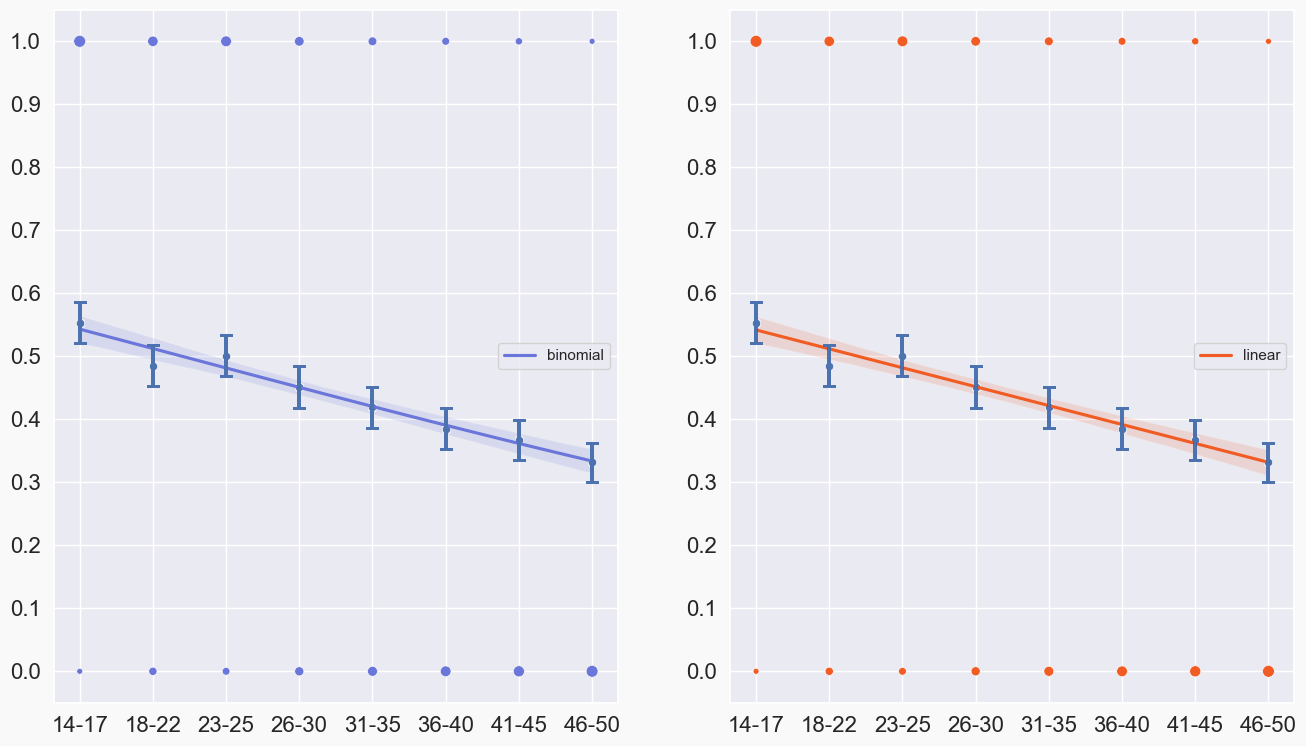

In [132]:
new_column = {'0-13':1,
            '14-17':2,
            '18-22':3,
            '23-25':4,
            '26-30':5,
            '31-35':6,
            '36-40':7,
            '41-45':8,
            '46-50':9,
            '51-55':10,
            '56-60':11,
            '61-65':12,
            '65+':13}
sns.set_style("darkgrid", rc={'figure.facecolor': 'F9F9F9'})
fig, axs = plt.subplots(1, 2, figsize = (16, 9))
sns.regplot(data=res_new, x = "age_category", y = "cancelled_trial_flg",scatter=False, logistic=True, label="binomial", color="#6A76D9", ax=axs[0])
sns.regplot(data=res_new, x = "age_category", y = "cancelled_trial_flg",scatter=False, label='linear', color="#F05C24", ax=axs[1])
sns.scatterplot(data=res_new, x = "age_category", y = "fraction_cancelled", ax=axs[0])
# sns.scatterplot(data=res, x = "age_category", y = 0, size = res["total_people"] - res["cancelled_trial"], ax = axs[0], legend=False, color="#6A76D9")
# sns.scatterplot(data=res, x = "age_category", y = 0, size = res["total_people"] - res["cancelled_trial"], ax = axs[1], legend=False, color="#F05C24")
# sns.scatterplot(data=res, x = "age_category", y = 1, size = res["cancelled_trial"], ax = axs[0], legend=False, color="#6A76D9")
# sns.scatterplot(data=res, x = "age_category", y = 1, size = res["cancelled_trial"], ax = axs[1], legend=False, color="#F05C24")
sns.scatterplot(data=res_new, x = "age_category", y = "fraction_cancelled", ax=axs[1])
axs[0].errorbar(data=res_new, x = "age_category", y = "fraction_cancelled", yerr="ci_95p", fmt="none", capsize=4)
axs[1].errorbar(data=res_new, x = "age_category", y = "fraction_cancelled", yerr="ci_95p", fmt="none", capsize=4)
axs[0].set_xticklabels(list(new_column.keys()), size = 16)
axs[1].set_xticklabels(list(new_column.keys()), size = 16)
axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[0].set_ylabel(None)
axs[1].set_ylabel(None)
axs[0].set_yticks(np.arange(0,1.1,0.1))
axs[1].set_yticks(np.arange(0,1.1,0.1))
axs[0].set_yticklabels(np.around(np.arange(0,1.1,0.1), 1), size = 16)
axs[1].set_yticklabels(np.around(np.arange(0,1.1,0.1), 1), size = 16)
# ax.set_xticklabels([])
# ax.set_yticklabels([])
fig.savefig("../images/regplot.png")

In [125]:
X = res_new.age_category #to_numpy()
Y = res_new.cancelled_trial_flg.to_numpy()
X = sm.add_constant(X)

lin_model = sm.OLS(Y,X)
bin_model = sm.GLM(Y, X, family=sm.families.Binomial())
lin_res = lin_model.fit()
bin_res = bin_model.fit()

print(lin_res.summary(), bin_res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.43e-31
Time:                        00:36:00   Log-Likelihood:                -4984.5
No. Observations:                7040   AIC:                             9973.
Df Residuals:                    7038   BIC:                             9987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6019      0.015     39.533   